In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential

In [3]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling=None, #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [4]:
from keras.layers import Flatten,Dense

In [5]:
model.add(model_part1)

In [6]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
fashion_mnist=keras.datasets.fashion_mnist

In [9]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train = np.expand_dims(X_train, axis=-1)
X_train = tf.image.resize(X_train, [32,32])

In [13]:
X_train[0].shape

TensorShape([32, 32, 1])

In [14]:
import cv2

In [15]:
X_train[5999].shape

TensorShape([32, 32, 1])

In [16]:
img=cv2.cvtColor(np.array(X_train[2]),cv2.COLOR_GRAY2RGB)
#ig=cv2.cvtColor(X_train[0],cv2.COLOR_GRAY2RGB)

In [17]:
np.array(img).shape


(32, 32, 3)

In [18]:
X_train[2].shape

TensorShape([32, 32, 1])

In [19]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [20]:
Converted_to_rgb=[]
resized_files = []
grey_scale=[]
i=0;
from PIL import Image

In [21]:
for x in range(60000):
    #print(X_train[x])
    #img=Image.open(X_train[i]).convert('L')
    #img.save('greyscale.jpeg')
    #grey_scale.append(img)
    
    im= cv2.cvtColor(np.array(X_train[x]),cv2.COLOR_GRAY2RGB)
    Converted_to_rgb.append(im)
    
    
    #img=Converted_to_rgb[i].resize((32,32,3))
    #resized_files.append(img)
    
    #i=i+1
    
        
 #use loop for converting all images

In [22]:
Converted_to_rgb[1000].shape

(32, 32, 3)

In [23]:
#np.array(resized_files[11]).shape

In [24]:
X_train[1].shape

TensorShape([32, 32, 1])

In [25]:
Converted_to_rgb

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [26]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


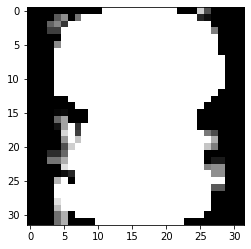

In [27]:
plt.imshow(Converted_to_rgb[55])

In [28]:
len(Converted_to_rgb)

60000

In [29]:
len(Y_train)

60000

In [30]:
Y_train.shape

(60000,)

In [31]:
X_test.shape

(10000, 28, 28)

In [50]:
Y_test.shape

(10000,)

In [33]:
Y_train[10340]

2

In [34]:
X_test[0].shape

(28, 28)

In [35]:
test = []

In [36]:
X_test = np.expand_dims(X_test, axis=-1)
X_test = tf.image.resize(X_test, [32,32])

In [37]:
X_test[0]

<tf.Tensor: shape=(32, 32, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [38]:
X_test[0].shape

TensorShape([32, 32, 1])

In [39]:
for x in range(10000):
    imag= cv2.cvtColor(np.array(X_test[x]),cv2.COLOR_GRAY2RGB)
    test.append(imag)
    
    
    #img=Converted_to_rgb[i].resize((32,32,3))
    #resized_files.append(img)
    
    #i=i+1
    

In [40]:
np.array(test).shape

(10000, 32, 32, 3)

In [41]:
x_train=np.zeros((len(Converted_to_rgb),32,32,3))
for i,fi in enumerate(Converted_to_rgb):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==32 and fi_array.shape[1]==32):
        x_train[i,:,:,:]=fi_array
        
        
x_test=np.zeros((len(test),32,32,3))
for i,fi in enumerate(test):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==32 and fi_array.shape[1]==32):
        x_test[i,:,:,:]=fi_array

In [42]:
x_train.shape

(60000, 32, 32, 3)

In [43]:
x_test.shape

(10000, 32, 32, 3)

In [44]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [45]:
model.fit(x_train, Y_train, epochs=5, batch_size=20, validation_data=(x_test, Y_test))

Epoch 1/5
3000/3000 [==============================] - 149s 48ms/step - loss: 0.5396 - accuracy: 0.8134 - val_loss: 0.4630 - val_accuracy: 0.8333
Epoch 2/5
3000/3000 [==============================] - 142s 47ms/step - loss: 0.4021 - accuracy: 0.8493 - val_loss: 0.4224 - val_accuracy: 0.8484
Epoch 3/5
3000/3000 [==============================] - 139s 46ms/step - loss: 0.3626 - accuracy: 0.8629 - val_loss: 0.3959 - val_accuracy: 0.8565
Epoch 4/5
3000/3000 [==============================] - 123s 41ms/step - loss: 0.3360 - accuracy: 0.8729 - val_loss: 0.3974 - val_accuracy: 0.8625
Epoch 5/5
3000/3000 [==============================] - 97s 32ms/step - loss: 0.3121 - accuracy: 0.8826 - val_loss: 0.4164 - val_accuracy: 0.8505


In [46]:
model.predict(x_test)

313/313 [==============================] - 15s 39ms/step


array([[1.3370865e-14, 1.3999428e-18, 4.0266991e-24, ..., 8.0098471e-06,
        2.3462742e-11, 9.9999189e-01],
       [2.5668234e-05, 8.0476337e-10, 9.9981767e-01, ..., 8.9784592e-16,
        6.7978738e-07, 1.7466529e-16],
       [5.6214219e-08, 9.9999571e-01, 7.2299400e-08, ..., 8.2456085e-13,
        6.3868542e-11, 6.0009325e-16],
       ...,
       [2.6130684e-12, 6.0868715e-13, 2.5953776e-14, ..., 9.9168229e-09,
        1.0000000e+00, 2.4753158e-08],
       [1.7870795e-13, 1.0000000e+00, 3.3006250e-13, ..., 4.0488853e-22,
        1.0359177e-19, 2.8407364e-23],
       [1.4197920e-04, 8.3916537e-05, 2.0171299e-05, ..., 7.9236144e-01,
        8.9246221e-04, 1.5269393e-02]], dtype=float32)

In [47]:
model.evaluate(x_test, Y_test, batch_size=128)

79/79 [==============================] - 10s 113ms/step - loss: 0.4164 - accuracy: 0.8505


[0.416350394487381, 0.8504999876022339]